<a href="https://colab.research.google.com/github/faarh/AI/blob/main/House_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

           id       Date  number of bedrooms  number of bathrooms  \
0  6762810145 2016-05-01                   5                 2.50   
1  6762810635 2016-05-01                   4                 2.50   
2  6762810998 2016-05-01                   5                 2.75   
3  6762812605 2016-05-01                   4                 2.50   
4  6762812919 2016-05-01                   3                 2.00   

   living area  lot area  number of floors  waterfront present  \
0         3650      9050               2.0                   0   
1         2920      4000               1.5                   0   
2         2910      9480               1.5                   0   
3         3310     42998               2.0                   0   
4         2710      4500               1.5                   0   

   number of views  condition of the house  ...  Built Year  Renovation Year  \
0                4                       5  ...        1921                0   
1                0          

# New Section

In [4]:
dataset.shape

(14620, 23)

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 18
Float variables: 4


<Axes: >

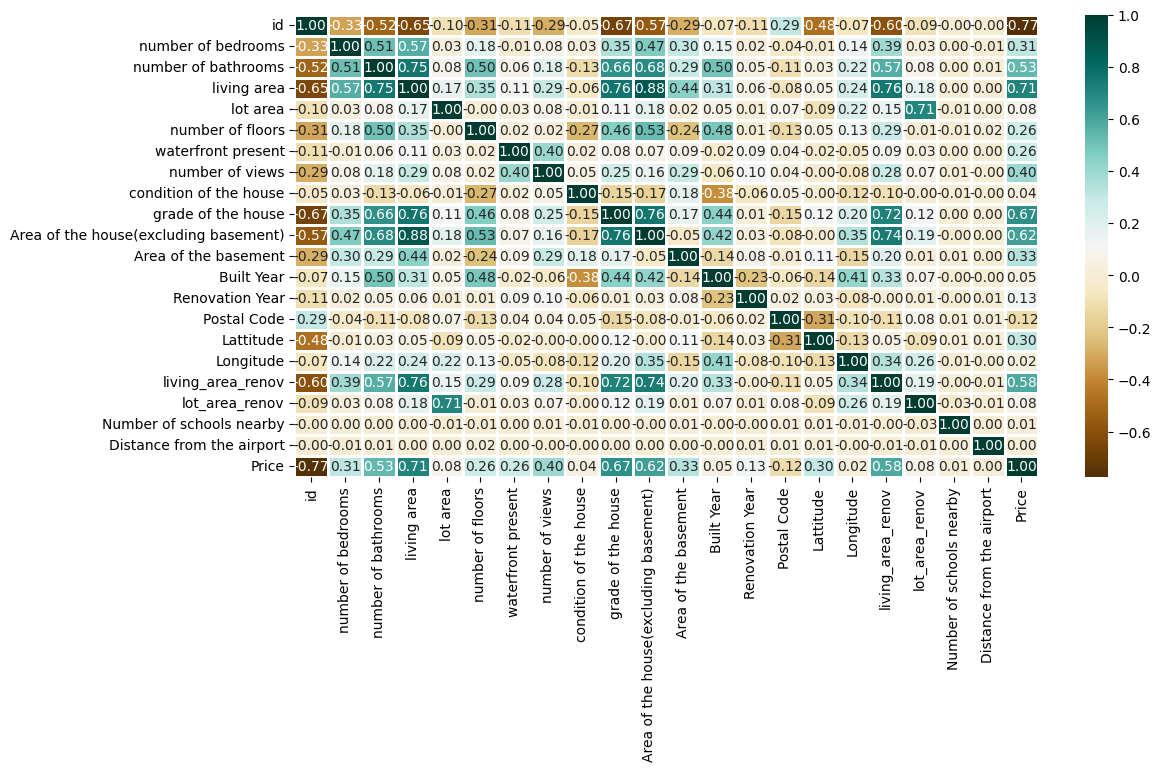

In [6]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

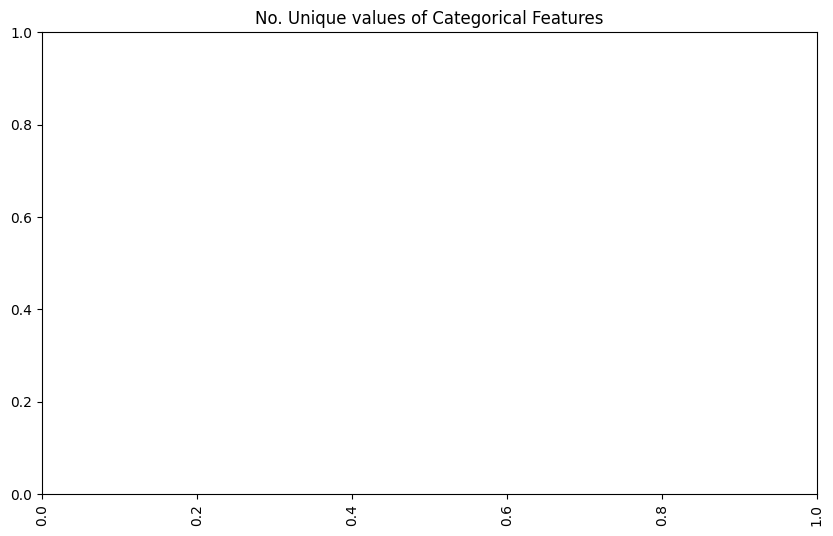

In [7]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

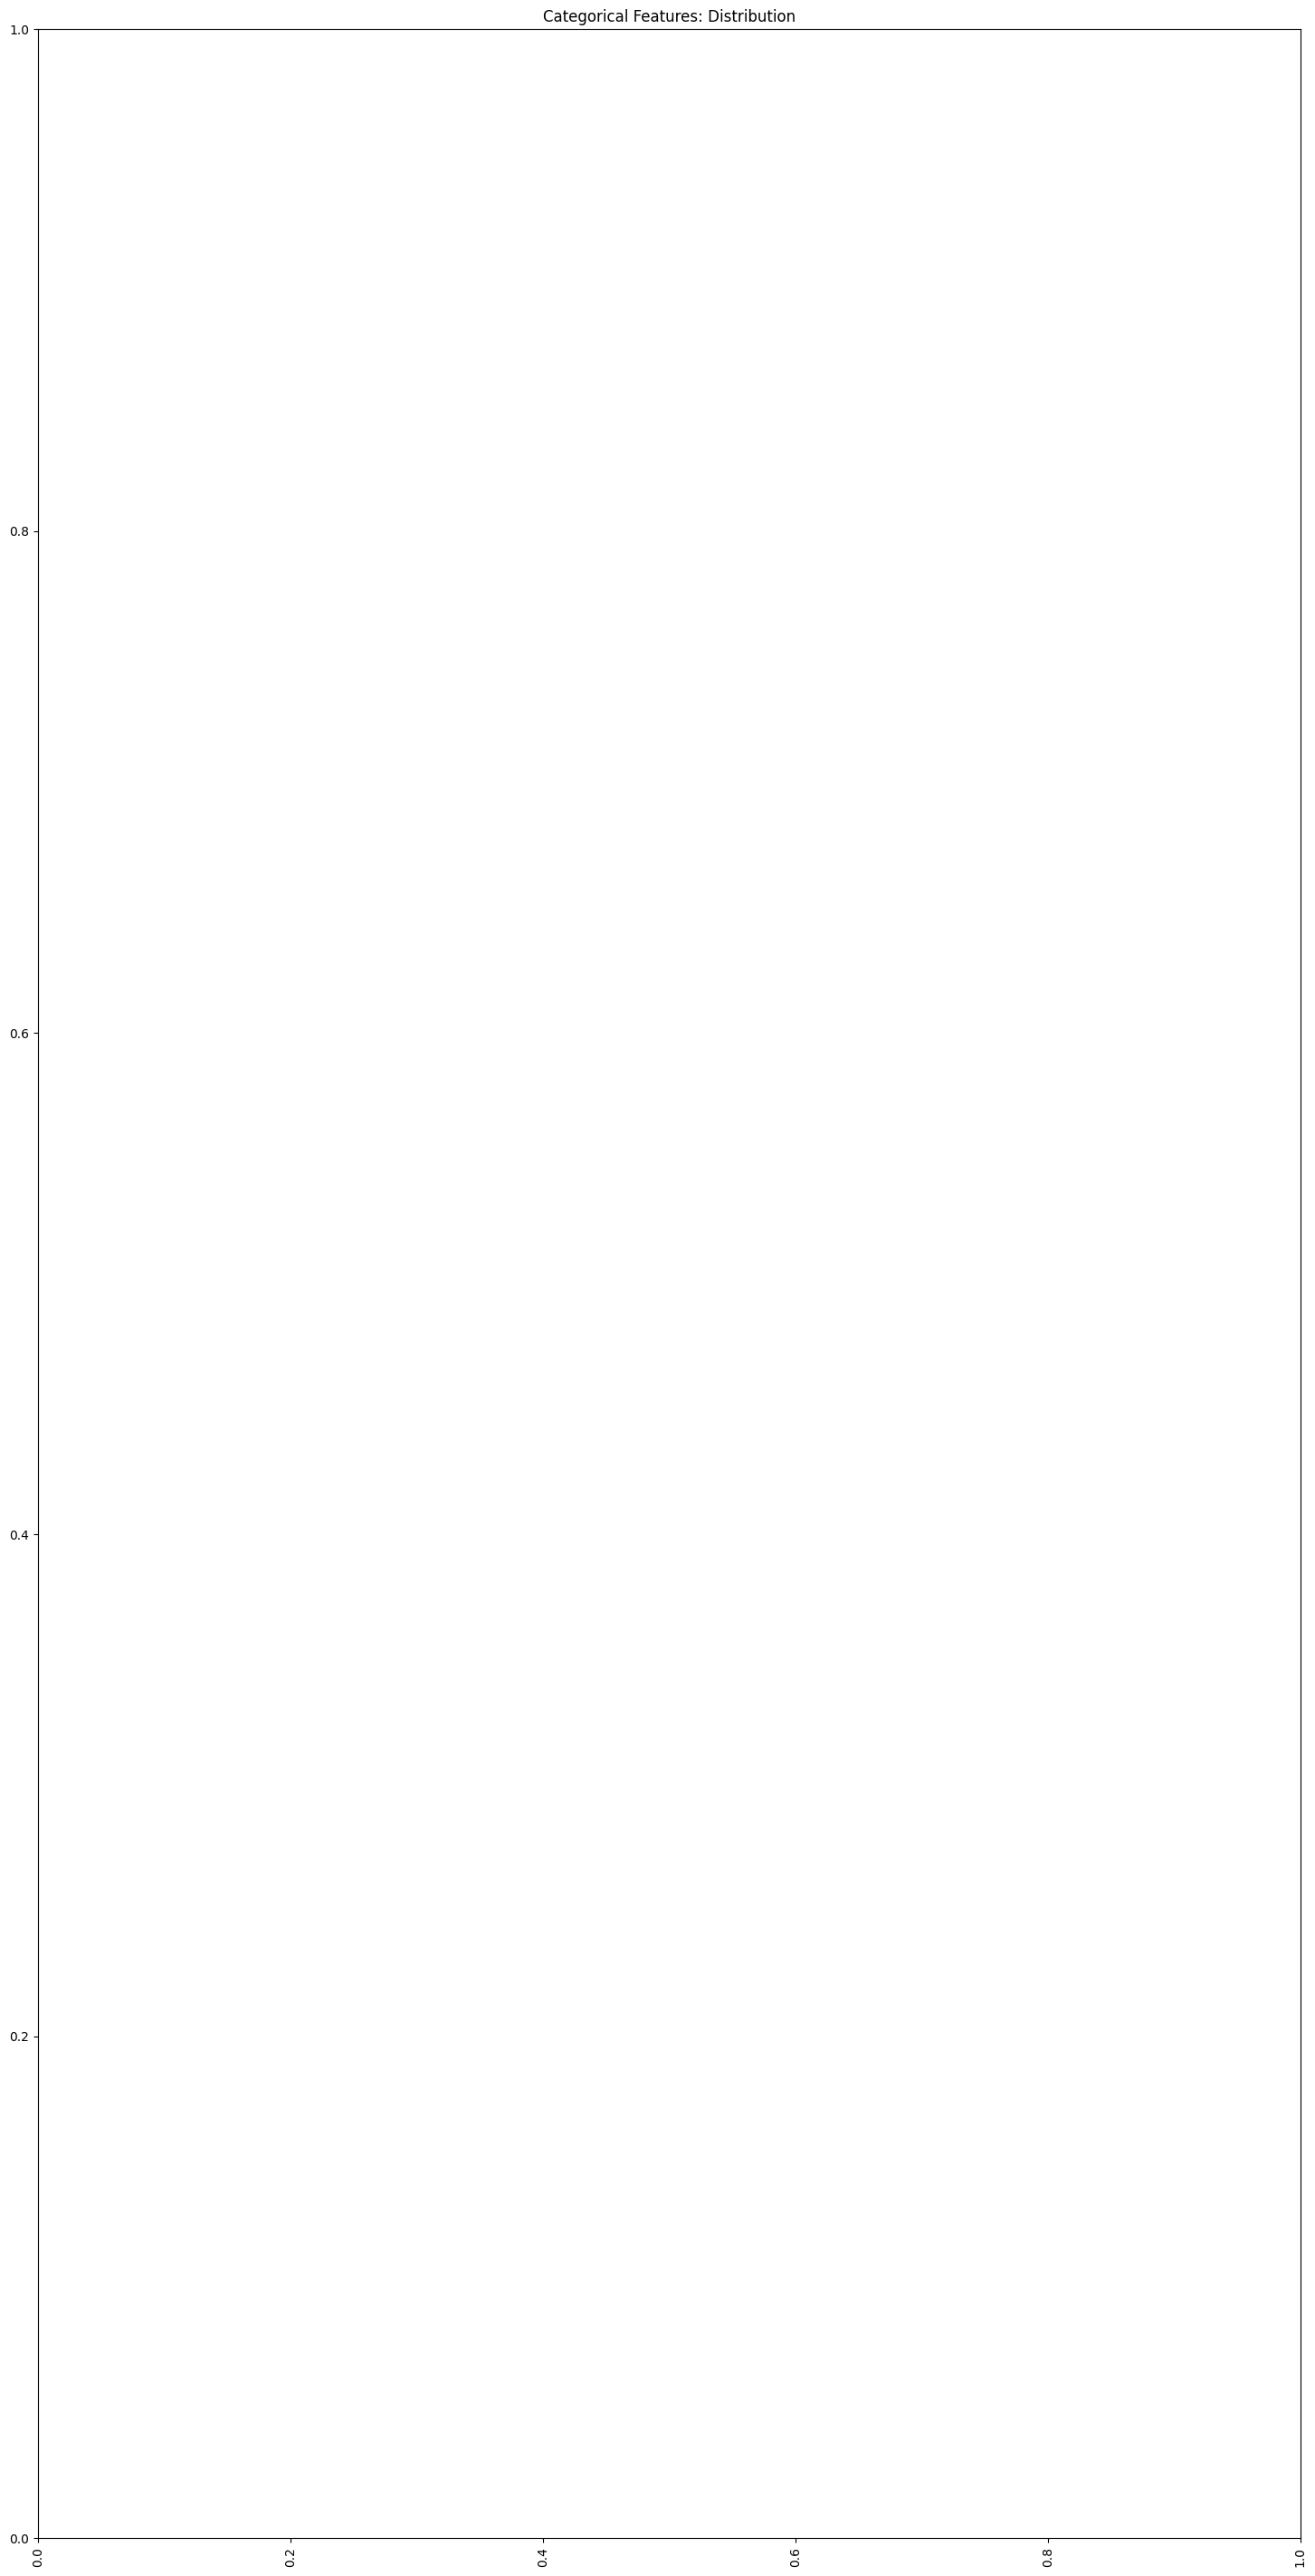

In [8]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [10]:
dataset.drop(['id'],
             axis=1,
             inplace=True)

In [12]:
dataset['Price'] = dataset['Price'].fillna(
  dataset['Price'].mean())

In [13]:
new_dataset = dataset.dropna()

In [14]:
new_dataset.isnull().sum()

,0
Date,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0
grade of the house,0


In [15]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0
